In [4]:
from settings import init
init()

import numpy as np
import matplotlib.pyplot as plt

from functions.saddle_point_evolution.SE_functions import run_SE_binary
from functions.experiment.superstats_experiment_functions import simulate_superstats


# Global parameters

In [5]:
# dataset settings
prob = 0.5                                      # cluster balance
variances_distr = 'inversegamma'                # type of variance distribution
param_a = 2                                     # shape parameter a of the inverse-gamma distribution
param_c = param_a - 1                           # scale parameter c of the inverse-gamma distribution
# dimension of var_distr_param changes depending on distribution choice, see function gendeltas() in SE_functions.py
var_distr_param = np.array([param_a, param_c])  

# l2 regularisation strength
lamb = 1e-4


# Theory

### set theory parameters

In [6]:
alphas_theory = np.arange(0.1,5.05,0.2) 
init = (0.01,0.1,0.1,0)
max_iter=int(500)
eps=1e-5

# 'MC' for Monte-Carlo: recommended for infinite-variance distributions a<1 or a close to 1
# 'quad' from scipy: if using for small a anyways, recommended to increase quad integration interval and set parameter limit=200
integration_type = 'quad' 

# settings
save = True
verbose = True

### run state evolution equations

In [7]:
theory_df = run_SE_binary(alphas_theory, lamb, variances_distr, var_distr_param, prob, max_iter, eps, init, integration_type, verbose=verbose)


α=0.1
v:  9000.765490028836
starting state evolution...
reached precision, break evolution at t = 42
computing errors...
t: 42, v: 9000.765490028836, q: 0.1850463982158334, m: [ 0.16661956 -0.16661956], b: -1.347443472162371e-09, generr: 0.30617768100000325 

α=0.30000000000000004
v:  7002.486553555728
starting state evolution...
t: 50, v: 7002.486553555728, q: 0.535167093372185, m: [ 0.37489822 -0.37489822], b: -1.0869302476657952e-20
reached precision, break evolution at t = 50
computing errors...
t: 50, v: 7002.486553555728, q: 0.5351670924694366, m: [ 0.37489822 -0.37489822], b: -1.8115504127763253e-20, generr: 0.25470073400000115 

α=0.5000000000000001
v:  5004.7137151482475
starting state evolution...
t: 50, v: 5004.7137151482475, q: 0.9980608046151178, m: [ 0.49984871 -0.49984871], b: -8.785453690983999e-32
reached precision, break evolution at t = 80
computing errors...
t: 80, v: 5004.7137151482475, q: 0.9980639412389463, m: [ 0.49984871 -0.49984871], b: -3.2370578066513606e-38

#### option to save

In [8]:
theory_df.to_csv('./data/theory/SE_sc{}to{}_lam{}_prob{}_var_distr{}_a{}_c{}.csv'.format(alphas_theory[0], alphas_theory[-1], 
                                                    lamb, prob, variances_distr, var_distr_param[0], var_distr_param[1]), index=False)


# Experiment

In [11]:
# range of sample complexity value alpha=n/d to compute for
alphas = np.arange(0.1,5.05,0.6)

dimension = 500
seeds = 10

# optimizer settings
penalty = 'l2'
loss = 'square'

# set true for random labels and adjust desired ratio of random/non-random labels
random_labels = False
ratio_random = 0

# settings
save = True
verbose = True
data_dir = './data/experiment/'

experiment_a2 = simulate_superstats(prob, alphas, lamb, variances_distr, var_distr_param, 
                                                                 dimension, seeds, penalty, loss, random_labels, 
                                                                 ratio_random, save, verbose, data_dir)



Simulating sample complexity: 0.1
gen error: 0.316, train error: 0.0, train loss: 2.7228563949499894e-08 
Simulating sample complexity: 0.7
gen error: 0.2945714285714286, train error: 0.0, train loss: 2.492908446625497e-07 
Simulating sample complexity: 1.3
gen error: 0.30323076923076925, train error: 0.0016923076923076818, train loss: 0.04167879109975204 
Simulating sample complexity: 1.9
gen error: 0.23821052631578948, train error: 0.01863157894736841, train loss: 0.09330294152552755 
Simulating sample complexity: 2.5
gen error: 0.20183999999999996, train error: 0.03519999999999999, train loss: 0.1208021205848401 
Simulating sample complexity: 3.1
gen error: 0.18735483870967742, train error: 0.05316129032258067, train loss: 0.1415764316770725 
Simulating sample complexity: 3.6999999999999997
gen error: 0.17371552190373177, train error: 0.06289886425094646, train loss: 0.15240759779980198 
Simulating sample complexity: 4.3
gen error: 0.1687906976744186, train error: 0.0697209302325581

# plot

/var/folders/4v/cnvdqk4s7wjgzxyh9s617kdm0000gn/T/ipykernel_91454/4178592140.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(np.array([0,0,1,2,3,4,5]),fontsize=17)


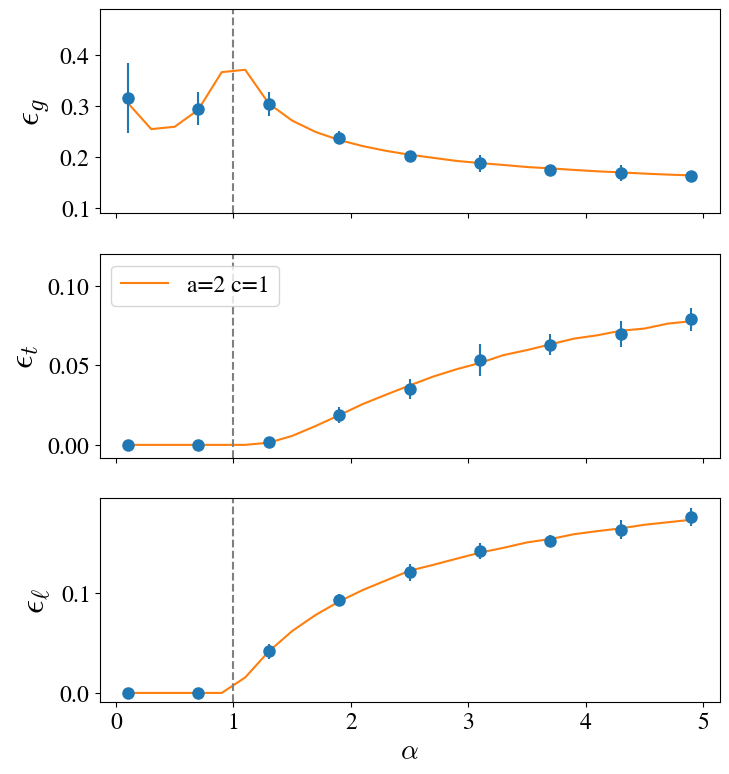

In [12]:
figures_dir = './figures/'
save_figure = True

fig, axes = plt.subplots(3,1,figsize=(8,9),sharex=True)

label_str='invgamma, a='+str(param_a)+', c='+str(param_c)

# plot theory lines
axes[0].plot(theory_df['sample_complexity'], theory_df['test_error'], color='tab:orange')
axes[1].plot(theory_df['sample_complexity'], theory_df['train_error'], color='tab:orange', label=label_str)
axes[2].plot(theory_df['sample_complexity'], theory_df['train_loss']/2, color='tab:orange')


# plot experiment dots
axes[0].errorbar(x=experiment_a2['sample_complexity'], y=experiment_a2['test_error'],yerr=experiment_a2['test_error_std'],linestyle='None', marker='o',ms=8, color='tab:blue')
axes[1].errorbar(x=experiment_a2['sample_complexity'], y=experiment_a2['train_error'],yerr=experiment_a2['train_error_std'],linestyle='None', marker='o',ms=8, color='tab:blue')
axes[2].errorbar(x=experiment_a2['sample_complexity'], y=experiment_a2['train_loss'],yerr=experiment_a2['train_loss_std'],linestyle='None', marker='o',ms=8, color='tab:blue')


axes[0].tick_params(axis='y', labelsize=17)
axes[0].set_ylabel(r'$\epsilon_g$', fontsize=25)
axes[1].tick_params(axis='y', labelsize=17)
axes[1].set_ylabel(r'$\epsilon_t$', fontsize=25)
axes[2].set_xticklabels(np.array([0,0,1,2,3,4,5]),fontsize=17)
axes[2].set_xlabel(r'$\alpha$', fontsize=20)
axes[2].set_ylabel(r'$\epsilon_\ell$', fontsize=25)
axes[2].tick_params(axis='y', labelsize=17)
axes[0].set_ylim(0.09,0.49)
axes[1].set_ylim(-0.008,0.12)
axes[0].axvline(x=1,ls='--',color='grey')
axes[1].axvline(x=1,ls='--',color='grey')
axes[2].axvline(x=1,ls='--',color='grey')
axes[1].legend(fontsize=17, loc='upper left')
plt.show()


if save_figure: fig.savefig(figures_dir+'errors_loss{}_varya_rho{}_l2regul{}_vardistr{}.png'.format(loss, prob, lamb, variances_distr), bbox_inches='tight')
